## Predict the Customer Churn for a Telco Company: <br> Exploratory Data Analysis (EDA)

In [2]:
# Import python data science libraries

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Sci-Learn Library
from sklearn.preprocessing import LabelEncoder



In [3]:
#setting the data directory
os.chdir('/home/mike/Documents/mkp_code/Institute of Data Course/telco-customer-churn-project/data/unprocessed')

In [4]:
customer_data = pd.read_csv('Telco-Customer-Churn.csv')

In [5]:
# Check the columns in the customer data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Drop customerID - This column is not needed
customer_data.drop('customerID',axis=1,inplace=True)

In [7]:
# Check if we have any NaN values and see which features have missing values that should be addressed
customer_data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Change the Monthly Charges from an object to int64
* Code adapted from IBM sample notebook, telco-customer-churn-on-icp4d.ipynb
https://github.com/IBM/telco-customer-churn-on-icp4d/blob/master/notebooks/Telco-customer-churn-ICP4D.ipynb


In [8]:
# Create an index for TotalCharges  
totalCharges = customer_data.columns.get_loc("TotalCharges")

# Convert the TotalCharges to numeric values
new_col = pd.to_numeric(customer_data.iloc[:, totalCharges], errors='coerce')

# Update customer_data dataframe
customer_data.iloc[:, totalCharges] = pd.Series(new_col)

In [9]:
# Fill the TotalCharges missing values
customer_data.TotalCharges.fillna(customer_data.TotalCharges.mean(), inplace = True)

In [10]:
# Check the Churn rate:
print(customer_data.groupby(['Churn']).size())

Churn
No     5174
Yes    1869
dtype: int64


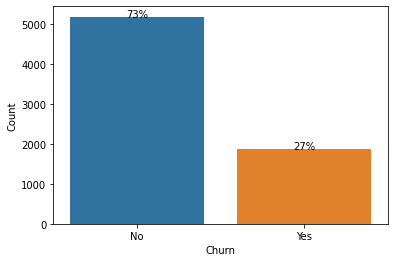

In [11]:
churn_plot = sns.countplot(data=customer_data, x='Churn', order=customer_data.Churn.value_counts().index)
plt.ylabel('Count')
for p in churn_plot.patches:
    height = p.get_height()
    churn_plot.text(p.get_x()+p.get_width()/2., height + 1,'{0:.0%}'.format(height/float(len(customer_data))),ha="center") 
plt.show()

In [12]:

# Divide the columns between categorical and continous context

# Slice of first row(header) with all columns.
columns_idx = np.s_[0:] 

# Index of first record
first_record_idx = np.s_[0] 

# Create a list with of all columns
string_fields = [type(fld) is str for fld in customer_data.iloc[first_record_idx, columns_idx]] 

# List all columns except y - Churn column
all_features = [x for x in customer_data.columns if x != 'Churn']

# List all Categorical Features (Churn included) 
categorical_columns = list(np.array(customer_data.columns)[columns_idx][string_fields])

# Remove the Churn column - the target variable
categorical_features = [x for x in categorical_columns if x != 'Churn']

# Select a remaining features as countinous
continuous_features = [x for x in all_features if x not in categorical_features]

# Check the variables
# print('All Features: ', all_features)
# print('\nCategorical Features: ', categorical_features)
# print('\nContinuous Features: ', continuous_features)
# print('\nAll Categorical Columns: ', categorical_columns)

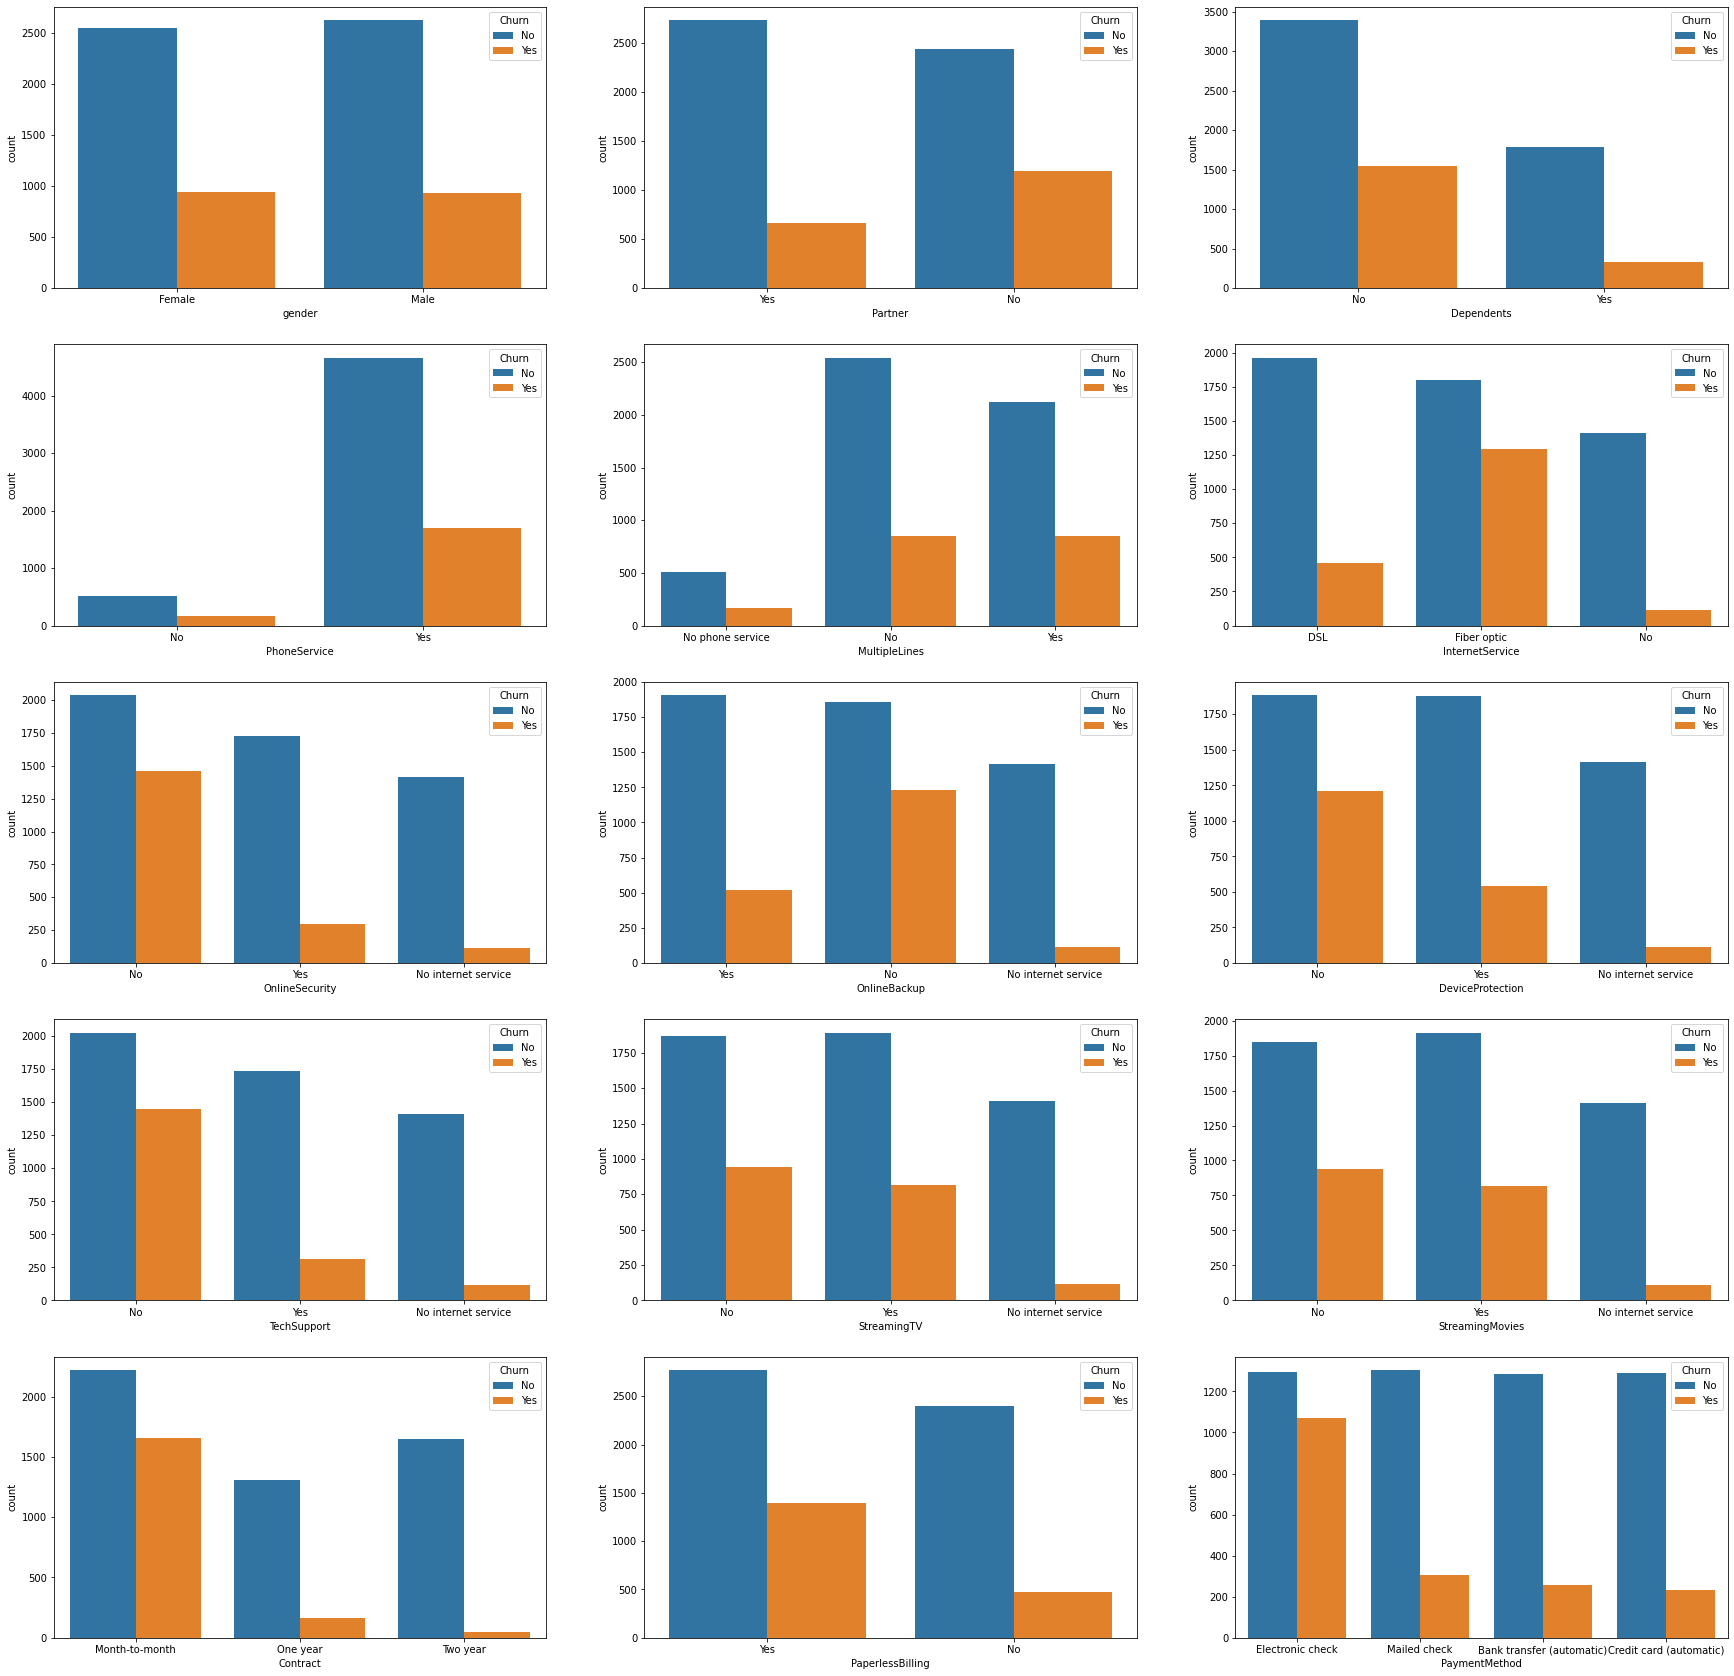

In [13]:
# Categorical feature count plots
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, figsize=(30, 30))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15 ]

for i in range(len(categorical_features)):
    sns.countplot(x = categorical_features[i], hue="Churn", data=customer_data, ax=ax[i])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f27d8d83cf8>,
      dtype=object)

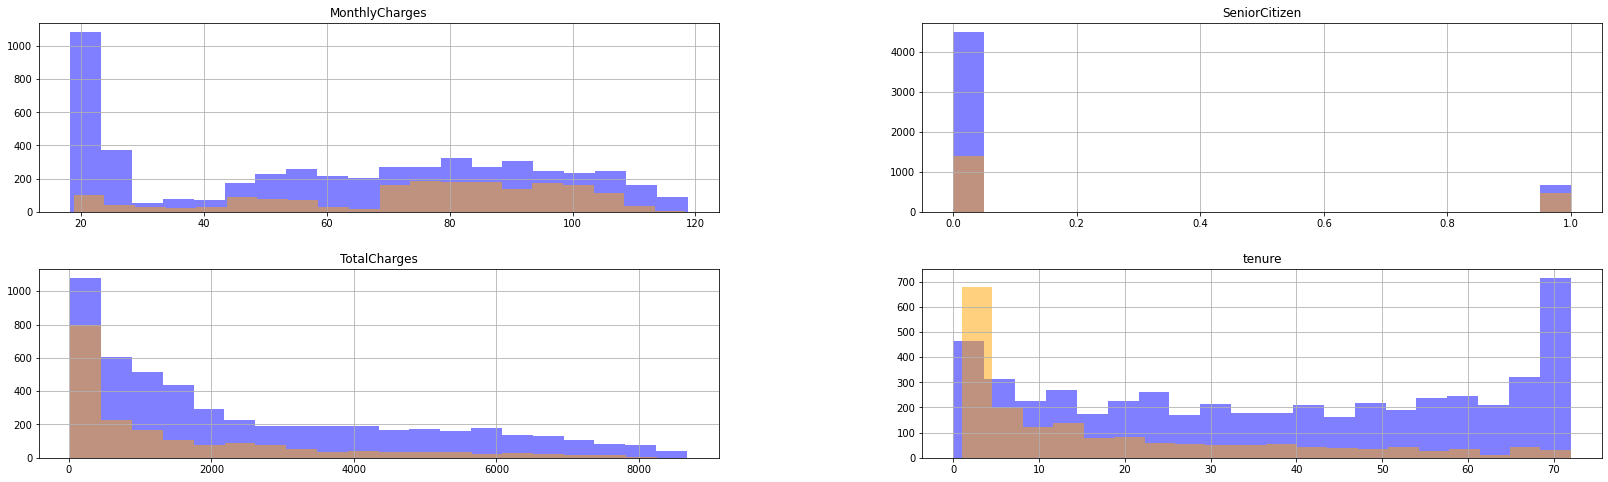

In [14]:
# Continuous feature histograms.
fig, ax = plt.subplots(2, 2, figsize=(28, 8))
customer_data[customer_data.Churn == 'No'][continuous_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
customer_data[customer_data.Churn == 'Yes'][continuous_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

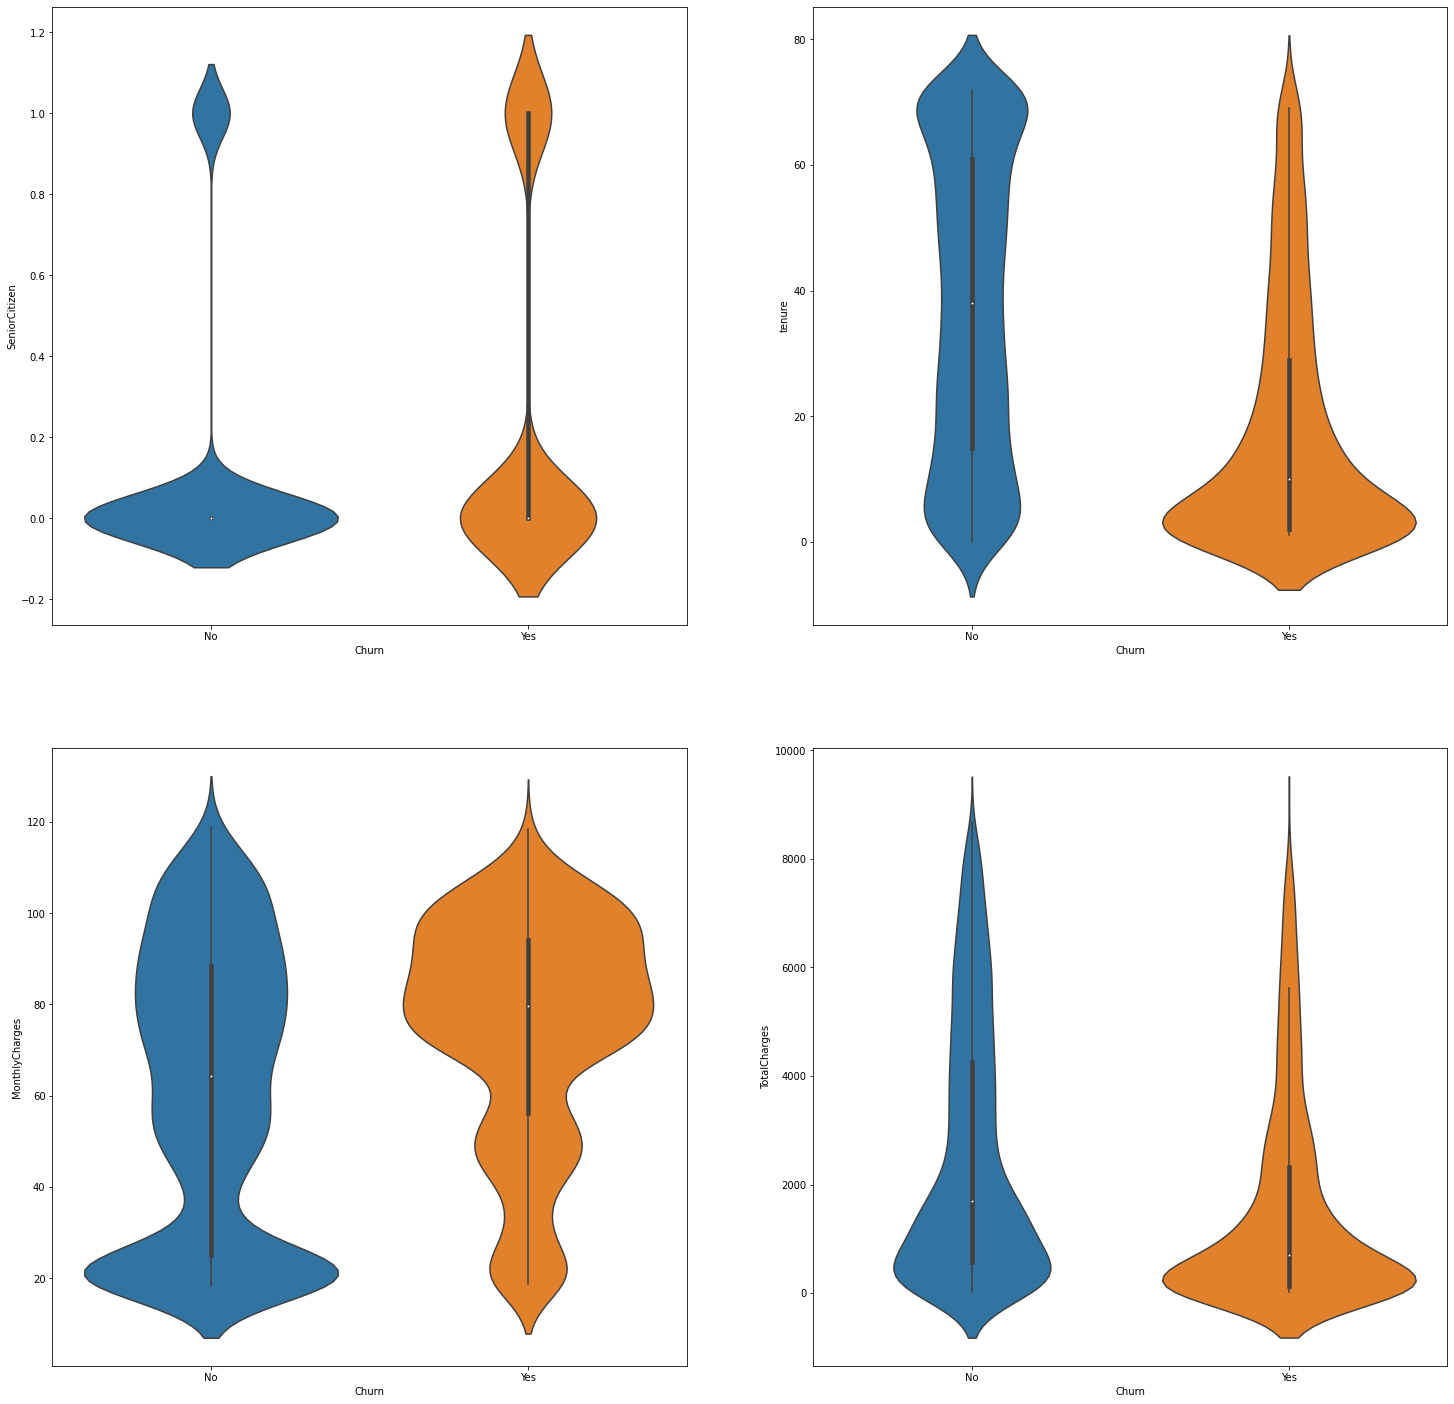

In [15]:
# Plot boxplots of numerical columns. More variation in the boxplot implies higher significance. 
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 25))
ax = [ax1, ax2, ax3, ax4]

for i in range(len(continuous_features)):
    sns.violinplot(x = 'Churn', y = continuous_features[i], data=customer_data, ax=ax[i])

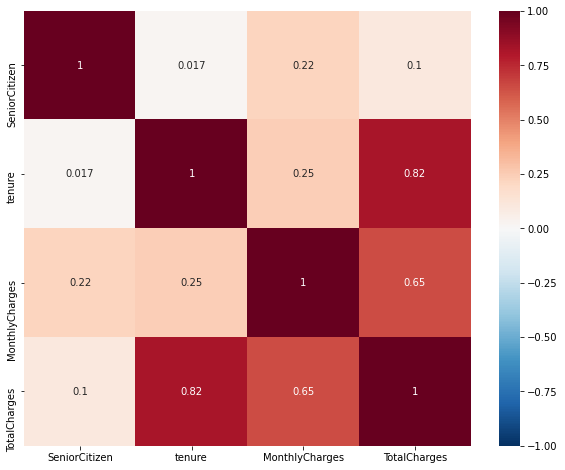

In [21]:
# Correlation of Numeric Features to the Sale Price:

corr = customer_data.corr()
plt.figure(figsize = (10,8))
heatmap = sns.heatmap(corr, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")